<a href="https://colab.research.google.com/github/Deveshc25/Project1/blob/main/Report1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns




In [2]:
data=pd.read_csv('Solar_Power_Monitoring_Dataset_India.csv')
data

,Day,Voltage (V),Current (A),Max Temperature (°C),Max Intensity (W/m^2),Max Humidity (%),Unnamed: 6,Actual Power (kW)
0,1/1/2024,217.652803,3.810620,26.236204,708.882110,23.141264,NaN,0.806098
1,1/2/2024,222.048621,6.159346,43.521429,1168.952451,75.165978,NaN,1.163547
2,1/3/2024,218.643826,6.016215,36.959818,1124.280514,63.215778,NaN,1.169325
3,1/4/2024,277.958447,2.343014,32.959755,556.632908,51.845234,NaN,0.596760
4,1/5/2024,235.012526,2.267633,19.680559,455.489041,38.706439,NaN,0.523634
...,...,...,...,...,...,...,...,...
360,12/26/2024,293.094870,4.285137,26.645098,1073.463021,85.418542,NaN,1.140406
361,12/27/2024,268.952675,2.226514,34.298647,511.817901,61.971732,NaN,0.539443
362,12/28/2024,267.651339,4.529662,28.747587,1036.213849,58.618944,NaN,1.123128
363,12/29/2024,221.567515,2.963987,31.368504,561.301856,51.015081,NaN,0.606491


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Day                    365 non-null    object 
 1   Voltage (V)            365 non-null    float64
 2   Current (A)            365 non-null    float64
 3   Max Temperature (°C)   365 non-null    float64
 4   Max Intensity (W/m^2)  365 non-null    float64
 5   Max Humidity (%)       365 non-null    float64
 6   Unnamed: 6             0 non-null      float64
 7   Actual Power (kW)      365 non-null    float64
dtypes: float64(7), object(1)
memory usage: 22.9+ KB


In [3]:
del data["Unnamed: 6"]

In [4]:
data.head()

,Day,Voltage (V),Current (A),Max Temperature (°C),Max Intensity (W/m^2),Max Humidity (%),Actual Power (kW)
0,1/1/2024,217.652803,3.810620,26.236204,708.882110,23.141264,0.806098
1,1/2/2024,222.048621,6.159346,43.521429,1168.952451,75.165978,1.163547
2,1/3/2024,218.643826,6.016215,36.959818,1124.280514,63.215778,1.169325
3,1/4/2024,277.958447,2.343014,32.959755,556.632908,51.845234,0.596760
4,1/5/2024,235.012526,2.267633,19.680559,455.489041,38.706439,0.523634


In [5]:
data.describe()

,Voltage (V),Current (A),Max Temperature (°C),Max Intensity (W/m^2),Max Humidity (%),Actual Power (kW)
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,251.030510,3.764599,29.746411,795.713438,49.872310,0.867147
std,29.773543,1.237055,8.732118,240.509931,23.234641,0.265937
min,200.493998,1.633678,15.151848,408.670121,10.370562,0.420387
25%,222.845474,2.727035,22.255569,570.371329,29.102172,0.625608
50%,253.116953,3.669819,30.340272,793.693034,49.869422,0.869847
75%,276.102790,4.701939,36.870215,1009.208505,69.515703,1.111595
max,299.712450,6.870054,44.701616,1199.774139,89.834729,1.389285


In [7]:
data.isnull().sum()

,0
Day,0
Voltage (V),0
Current (A),0
Max Temperature (°C),0
Max Intensity (W/m^2),0
Max Humidity (%),0
Actual Power (kW),0


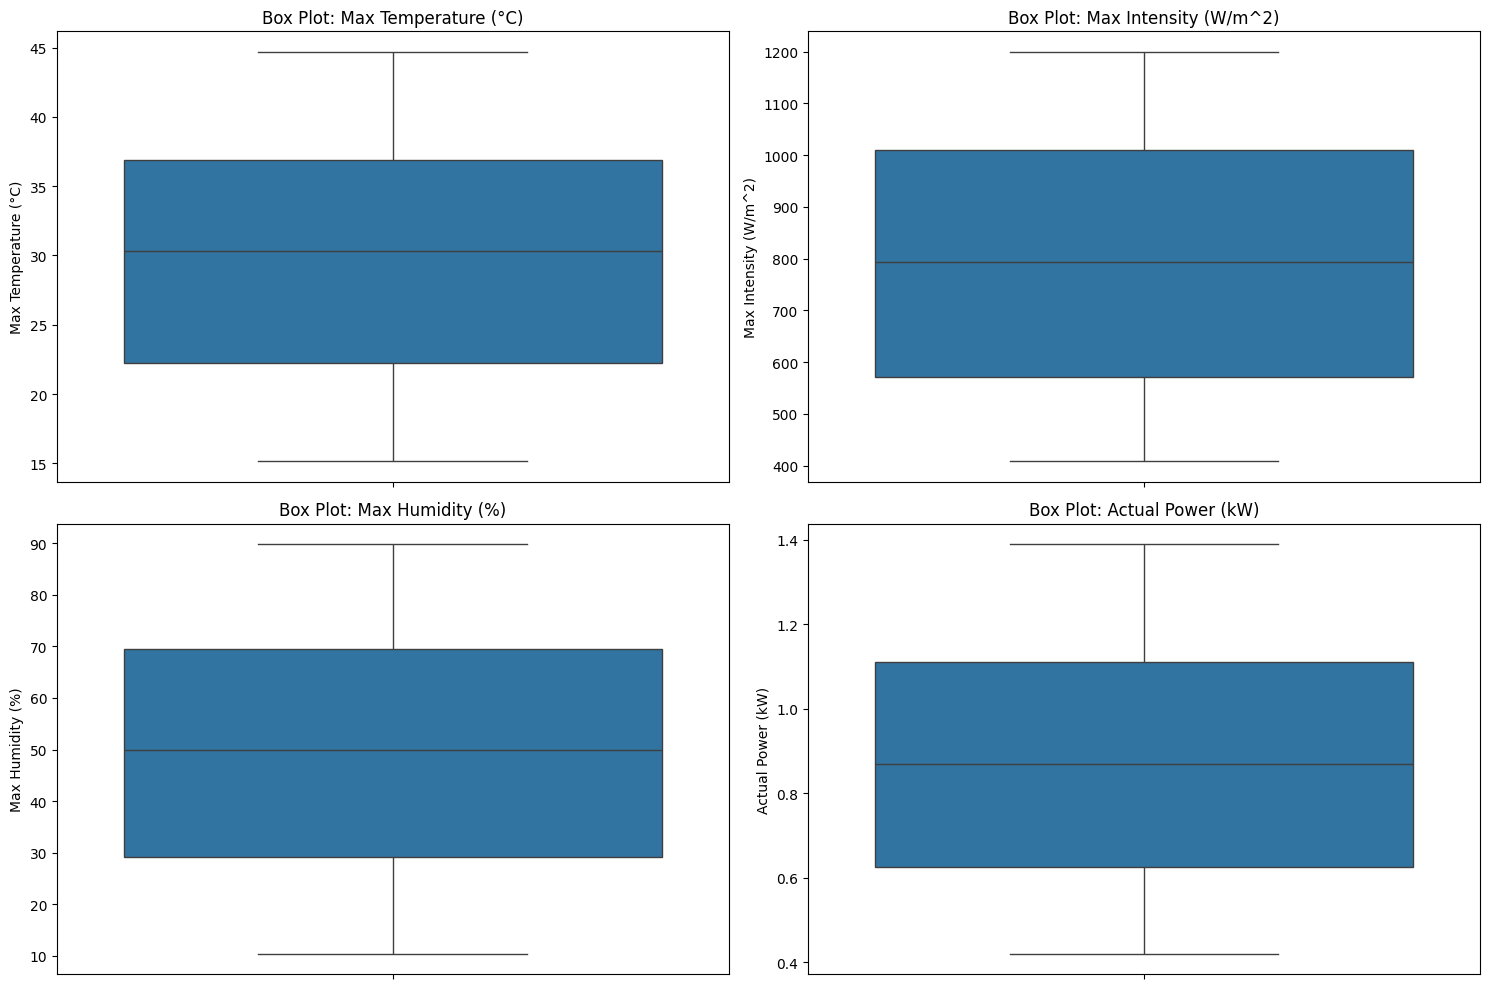

In [8]:
features = ['Max Temperature (°C)', 'Max Intensity (W/m^2)', 'Max Humidity (%)', 'Actual Power (kW)']
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=data[feature])
    plt.title(f"Box Plot: {feature}")
plt.tight_layout()
plt.show()


In [9]:
panel_area=6.5
panelefficiency=0.18


In [10]:
data["theoretical_power (kW)"]=(panel_area * panelefficiency * data['Max Intensity (W/m^2)'])/1000
data["theoretical_power"]=data["theoretical_power (kW)"]

In [11]:
data

,Day,Voltage (V),Current (A),Max Temperature (°C),Max Intensity (W/m^2),Max Humidity (%),Actual Power (kW),theoretical_power (kW),theoretical_power
0,1/1/2024,217.652803,3.810620,26.236204,708.882110,23.141264,0.806098,0.829392,0.829392
1,1/2/2024,222.048621,6.159346,43.521429,1168.952451,75.165978,1.163547,1.367674,1.367674
2,1/3/2024,218.643826,6.016215,36.959818,1124.280514,63.215778,1.169325,1.315408,1.315408
3,1/4/2024,277.958447,2.343014,32.959755,556.632908,51.845234,0.596760,0.651261,0.651261
4,1/5/2024,235.012526,2.267633,19.680559,455.489041,38.706439,0.523634,0.532922,0.532922
...,...,...,...,...,...,...,...,...,...
360,12/26/2024,293.094870,4.285137,26.645098,1073.463021,85.418542,1.140406,1.255952,1.255952
361,12/27/2024,268.952675,2.226514,34.298647,511.817901,61.971732,0.539443,0.598827,0.598827
362,12/28/2024,267.651339,4.529662,28.747587,1036.213849,58.618944,1.123128,1.212370,1.212370
363,12/29/2024,221.567515,2.963987,31.368504,561.301856,51.015081,0.606491,0.656723,0.656723


In [12]:
del data["theoretical_power"]

In [13]:
data["panel_efficiency"]=data['Actual Power (kW)']/data["theoretical_power (kW)"] * 100
data["panel_efficiency"]

,panel_efficiency
0,97.191392
1,85.074831
2,88.894495
3,91.631575
4,98.257132
...,...
360,90.800107
361,90.083368
362,92.639071
363,92.351090


In [14]:
data["Theoretical_Efficiency"] = (data['theoretical_power (kW)'] / 6.5  * 100)
data["Theoretical_Efficiency"]

,Theoretical_Efficiency
0,12.759878
1,21.041144
2,20.237049
3,10.019392
4,8.198803
...,...
360,19.322334
361,9.212722
362,18.651849
363,10.103433


In [15]:
data["Actual_Efficiency"] = (data['Actual Power (kW)'] / 6.5 ) * 100
data["Actual_Efficiency"]

,Actual_Efficiency
0,12.401503
1,17.900718
2,17.989623
3,9.180927
4,8.055908
...,...
360,17.544700
361,8.299130
362,17.278900
363,9.330631


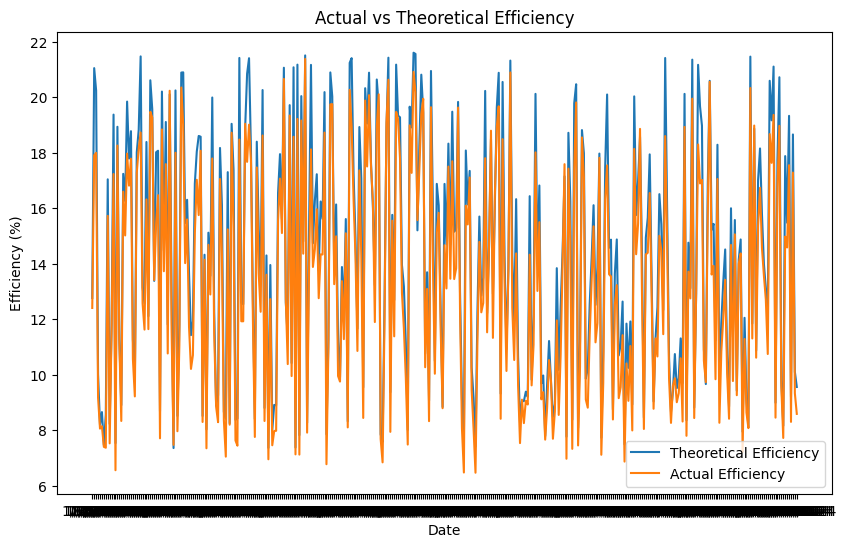

In [16]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Day', y='Theoretical_Efficiency', data=data, label='Theoretical Efficiency')
sns.lineplot(x='Day', y='Actual_Efficiency', data=data, label='Actual Efficiency')
plt.title("Actual vs Theoretical Efficiency")
plt.xlabel("Date")
plt.ylabel("Efficiency (%)")
plt.legend()
plt.savefig("efficiency_analysis.png")
plt.show()

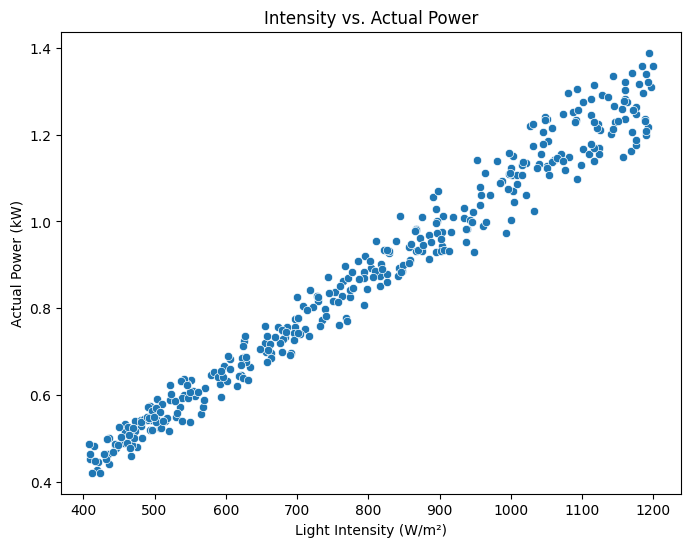

In [17]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Max Intensity (W/m^2)', y='Actual Power (kW)', data=data)
plt.title("Intensity vs. Actual Power")
plt.xlabel("Light Intensity (W/m²)")
plt.ylabel("Actual Power (kW)")
plt.savefig("intensity_vs_power.png")
plt.show()


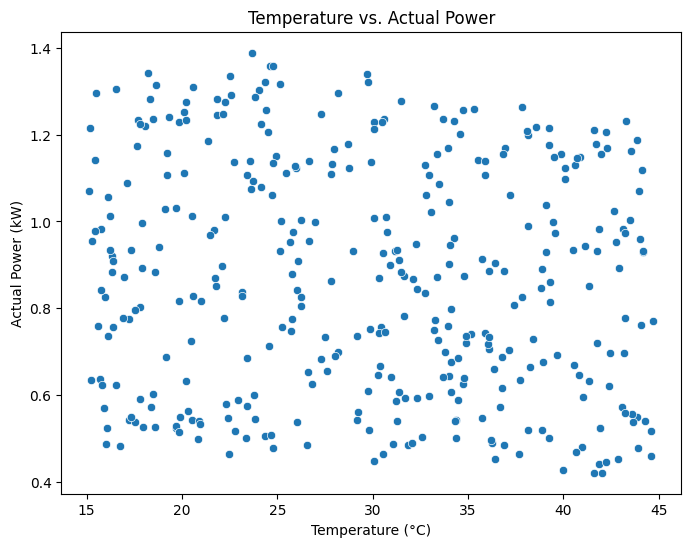

In [18]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Max Temperature (°C)', y='Actual Power (kW)', data=data)
plt.title("Temperature vs. Actual Power")
plt.xlabel("Temperature (°C)")
plt.ylabel("Actual Power (kW)")
plt.savefig("temperature_vs_power.png")
plt.show()

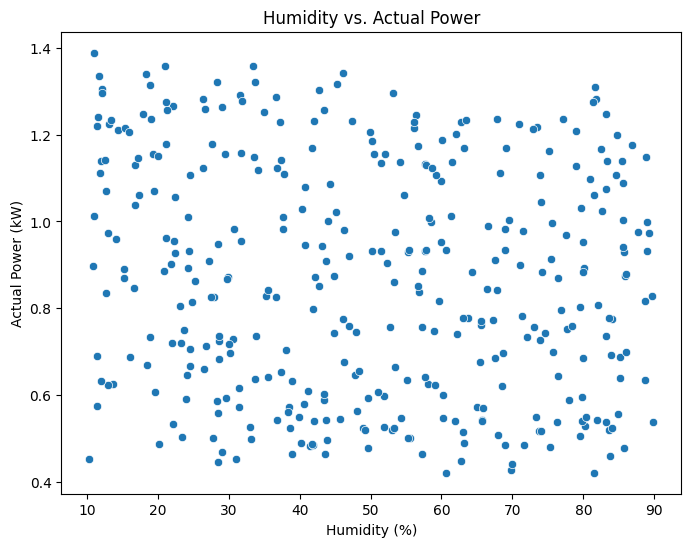

In [19]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Max Humidity (%)', y='Actual Power (kW)', data=data)
plt.title("Humidity vs. Actual Power")
plt.xlabel("Humidity (%)")
plt.ylabel("Actual Power (kW)")
plt.savefig("humidity_vs_power.png")
plt.show()

<ipython-input-36-be7cfe59cf05>:6: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  plt.savefig("Voltage (V) vs	Current (A)")
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


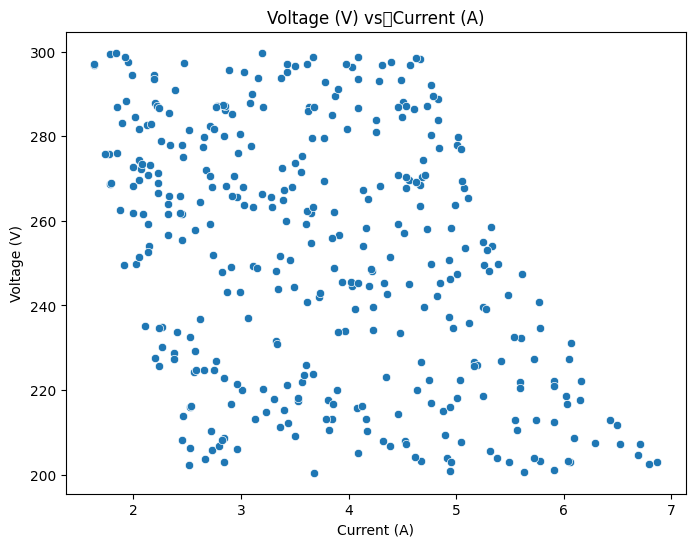

In [36]:
plt.figure(figsize=(8, 6))
sns.scatterplot(y='Voltage (V)', x='Current (A)', data=data)
plt.title("Voltage (V) vs	Current (A)")
plt.xlabel("Current (A)")
plt.ylabel("Voltage (V)")
plt.savefig("Voltage (V) vs	Current (A)")
plt.show()

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


Model Performance:
Mean Squared Error: 0.00
R² Score: 0.99
Mean Absolute Error (MAE): 0.02


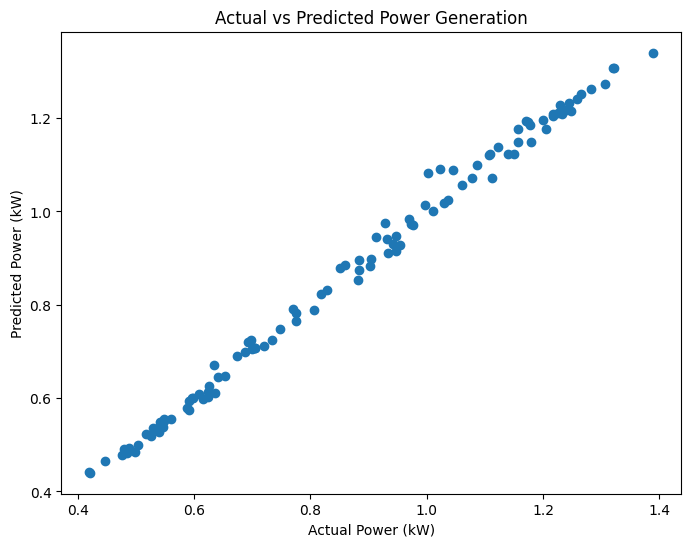


Cross-Validation Scores:
[0.99145824 0.99367151 0.99399686 0.99018441 0.9904    ]

Mean CV Score: 0.9919422051198689


In [32]:
features = data[['Max Temperature (°C)', 'Max Intensity (W/m^2)',	'Max Humidity (%)']]
target = data['Actual Power (kW)']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

# Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate Model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print("\nModel Performance:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
# Visualization: Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.title("Actual vs Predicted Power Generation")
plt.xlabel("Actual Power (kW)")
plt.ylabel("Predicted Power (kW)")
plt.savefig("prediction_results.png")
plt.show()



In [33]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X_train, y_train, cv=5,scoring="r2")
print("\nCross-Validation Scores:")
print(cv_scores)

print("\nMean CV Score:", np.mean(cv_scores))


Cross-Validation Scores:
[0.99145824 0.99367151 0.99399686 0.99018441 0.9904    ]

Mean CV Score: 0.9919422051198689


In [37]:
data

,Day,Voltage (V),Current (A),Max Temperature (°C),Max Intensity (W/m^2),Max Humidity (%),Actual Power (kW),theoretical_power (kW),panel_efficiency,Theoretical_Efficiency,Actual_Efficiency
0,1/1/2024,217.652803,3.810620,26.236204,708.882110,23.141264,0.806098,0.829392,97.191392,12.759878,12.401503
1,1/2/2024,222.048621,6.159346,43.521429,1168.952451,75.165978,1.163547,1.367674,85.074831,21.041144,17.900718
2,1/3/2024,218.643826,6.016215,36.959818,1124.280514,63.215778,1.169325,1.315408,88.894495,20.237049,17.989623
3,1/4/2024,277.958447,2.343014,32.959755,556.632908,51.845234,0.596760,0.651261,91.631575,10.019392,9.180927
4,1/5/2024,235.012526,2.267633,19.680559,455.489041,38.706439,0.523634,0.532922,98.257132,8.198803,8.055908
...,...,...,...,...,...,...,...,...,...,...,...
360,12/26/2024,293.094870,4.285137,26.645098,1073.463021,85.418542,1.140406,1.255952,90.800107,19.322334,17.544700
361,12/27/2024,268.952675,2.226514,34.298647,511.817901,61.971732,0.539443,0.598827,90.083368,9.212722,8.299130
362,12/28/2024,267.651339,4.529662,28.747587,1036.213849,58.618944,1.123128,1.212370,92.639071,18.651849,17.278900
363,12/29/2024,221.567515,2.963987,31.368504,561.301856,51.015081,0.606491,0.656723,92.351090,10.103433,9.330631


In [39]:
Efficiency_loss=data["Theoretical_Efficiency"]-	data["Actual_Efficiency"]
Efficiency_loss

,0
0,0.358375
1,3.140426
2,2.247427
3,0.838465
4,0.142894
...,...
360,1.777634
361,0.913592
362,1.372949
363,0.772802



Model Performance:
Mean Squared Error: 0.08
R² Score: 0.86
Mean Absolute Error (MAE): 0.21


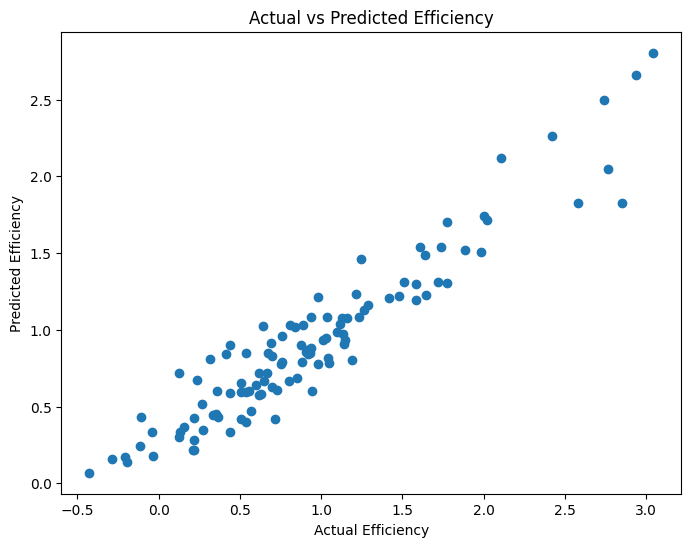


Cross-Validation Scores:
[0.77578763 0.80374609 0.76534426 0.83585968 0.77906337]

Mean CV Score: 0.7919602070648344


In [48]:
features = data[["Theoretical_Efficiency","Actual_Efficiency"]]
target = Efficiency_loss

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

# Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate Model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print("\nModel Performance:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
# Visualization: Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.title("Actual vs Predicted Efficiency")
plt.xlabel("Actual Efficiency")
plt.ylabel("Predicted Efficiency")
plt.savefig("prediction_results_Efficiency.png")
plt.show()
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X_train, y_train, cv=5,scoring="r2")
print("\nCross-Validation Scores:")
print(cv_scores)

print("\nMean CV Score:", np.mean(cv_scores))



Model Performance:
Mean Squared Error: 0.00
R² Score: 1.00
Mean Absolute Error (MAE): 0.00


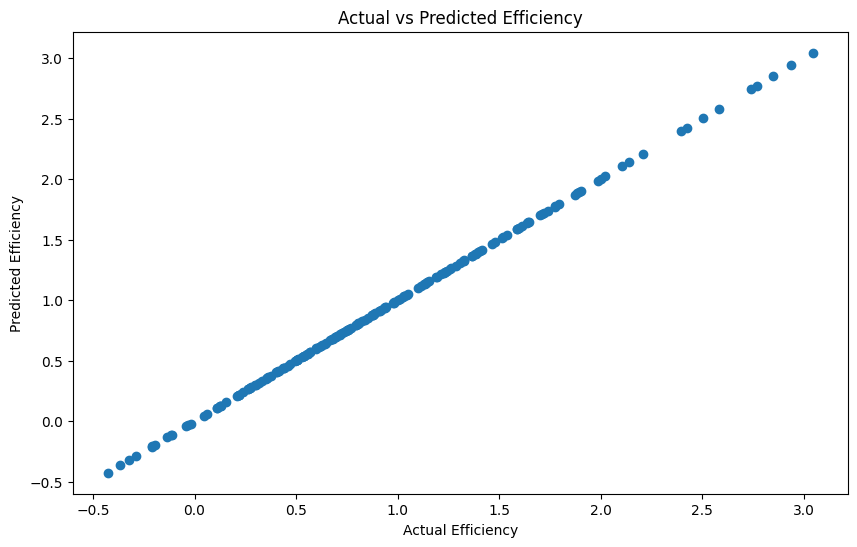


Cross-Validation Scores:
[1. 1. 1. 1. 1.]

Mean CV Score: 1.0


In [49]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

x = data[["Theoretical_Efficiency","Actual_Efficiency"]]
y = Efficiency_loss

X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=42)


model = LinearRegression()
model.fit(X_train, y_train)


# Predictions
y_pred = model.predict(X_test)

# Evaluate Model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("\nModel Performance:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
# Visualization: Actual vs Predicted


plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.title("Actual vs Predicted Efficiency")
plt.xlabel("Actual Efficiency")
plt.ylabel("Predicted Efficiency")
plt.savefig("prediction_results_Efficiency.png")
plt.show()

from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X_train, y_train, cv=5,scoring="r2")
print("\nCross-Validation Scores:")
print(cv_scores)

print("\nMean CV Score:", np.mean(cv_scores))